# Setting up a DASK cluster on your local machine

This notebook shows how to run a DASK cluster without a scheduler, that's what you would do on your workstation for example.

In [1]:
%matplotlib inline

In [2]:
import xarray as xr

First import the client, this is going to be our interface to see what happens on the DASK cluster:

In [3]:
from dask.distributed import Client

Then we will start a DASK cluster locally:

In [4]:
from dask.distributed import LocalCluster
cluster = LocalCluster()

Connect the client to the cluster:

In [5]:
client = Client(cluster)

In [6]:
client

Client Scheduler: tcp://127.0.0.1:40019 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 8.10 GB


Click on the dashboard link and this will open a new browser tab for the dask dashboard.
That's it we have a cluster up and running. Now let's see what we can do with it:

## Sample computation:

Open a sample dataset with xarray:

In [7]:
I_sit_at_GFDL = True

if I_sit_at_GFDL:
    dataurl = '/work/Raphael.Dussin/runs/OM4p5_sample/'
else:
    dataurl = 'http://35.188.34.63:8080/thredds/dodsC/THETAO_OM4p25/'
    
ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.thetao.nc',
                     chunks={'time':1, 'z_l': 1})

In [8]:
ds

<xarray.Dataset>
Dimensions:     (nv: 2, time: 60, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    average_DT  (time) timedelta64[ns] dask.array<shape=(60,), chunksize=(1,)>
    average_T1  (time) datetime64[ns] dask.array<shape=(60,), chunksize=(1,)>
    average_T2  (time) datetime64[ns] dask.array<shape=(60,), chunksize=(1,)>
    thetao      (time, z_l, yh, xh) float32 dask.array<shape=(60, 35, 576, 720), chunksize=(1, 1, 576, 720)>
    time_bnds   (time, nv) timedelta64[ns] dask.array<shape=(60, 2), chunksize=(1, 2)>
Attributes:
    filename

In [9]:
ds['thetao']

<xarray.DataArray 'thetao' (time: 60, z_l: 35, yh: 576, xh: 720)>
dask.array<shape=(60, 35, 576, 720), dtype=float32, chunksize=(1, 1, 576, 720)>
Coordinates:
  * time     (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature

Compute the time average. This is done lazyly so it is very quick. At this point no computations have been performed.

In [10]:
temp_mean = ds['thetao'].mean(dim=['time'])

We can select a vertical level and inspect the metadata of our time-mean surface temperature:

In [11]:
temp_mean.sel(z_l=2.5)

<xarray.DataArray 'thetao' (yh: 576, xh: 720)>
dask.array<shape=(576, 720), dtype=float32, chunksize=(576, 720)>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
    z_l      float64 2.5

Asking for plot or numerical values will trigger the computation. Time to check out the DASK dashboard ;)

CPU times: user 431 ms, sys: 107 ms, total: 538 ms
Wall time: 3.28 s


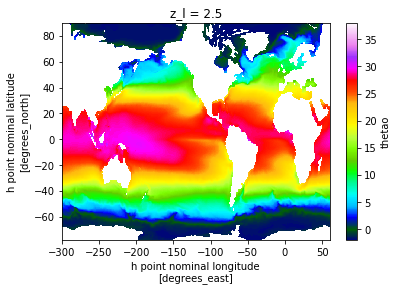

In [12]:
%time temp_mean.sel(z_l=2.5).plot(figsize=[10,8], vmin=-2, vmax=38, cmap='gist_ncar')

once finished, we can shut down the cluster and the client:

In [ ]:
cluster.close()
client.close()